In [3]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np 
import matplotlib.pyplot as plt # to plot a graph
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout # for creating neaural network
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D # for optimization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.9.2


In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

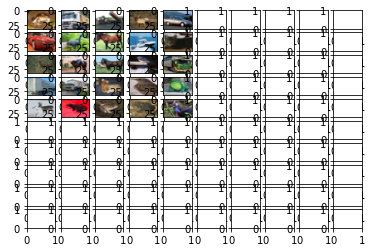

In [6]:
# visualize data by plotting images
fig, ax = plt.subplots(10, 10)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [ ]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

In [8]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 479s 306ms/step - loss: 1.3083 - accuracy: 0.5526 - val_loss: 0.9242 - val_accuracy: 0.6808
Epoch 2/2
1563/1563 [==============================] - 478s 306ms/step - loss: 0.8506 - accuracy: 0.7060 - val_loss: 0.8204 - val_accuracy: 0.7094


In [10]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=2)

Epoch 1/2
1562/1562 [==============================] - 498s 318ms/step - loss: 0.8480 - accuracy: 0.7094 - val_loss: 0.8219 - val_accuracy: 0.7231
Epoch 2/2
1562/1562 [==============================] - 506s 324ms/step - loss: 0.7541 - accuracy: 0.7422 - val_loss: 0.7435 - val_accuracy: 0.7435


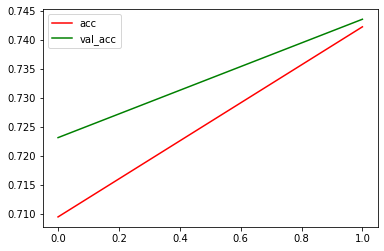

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

1/1 [==============================] - 0s 26ms/step
Original label is cat and predicted label is cat


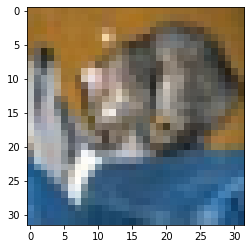

In [40]:
# label mapping
 
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [44]:
imgdata = x_test[image_number]

In [45]:
# # save the model
# model.save('imgclassification.h5')

In [51]:
# # save the model
model.save('model.pkk')

In [46]:
import matplotlib.pyplot as plt

In [47]:
import matplotlib.image

matplotlib.image.imsave('name.png', imgdata)

In [48]:
# imgdata = plt.imread("download.png")
# plt.imshow(imgdata)
# plt.savefig("result.png")
# import cv2
# cv2.imwrite("filename.png", imgdata)

In [63]:
import cv2
cv2.imwrite("filename.png", x_test[image_number])

True

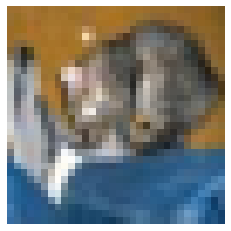

In [69]:
imd =  x_test[image_number]
img = plt.imshow(imd, interpolation='nearest')
img.set_cmap('hot')
plt.axis('off')
plt.savefig("result.png", bbox_inches='tight')

In [55]:
from tensorflow import keras
model = keras.models.load_model('imgclassification.h5')

In [73]:
# plt.imread("result.png")

(32, 32, 3)

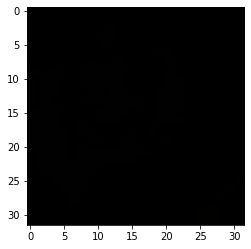

In [65]:
imd = plt.imread("filename.png")
plt.imshow(imd)
imd.shape

In [62]:
n = np.array(imd)/255
n.shape
p = n.reshape(1, 32, 32, 4)
predicted_label = labels[model.predict(p).argmax()] 
print("predicted label is {}".format(predicted_label))

ValueError: ignored